## Today
+ forward calculate:function
+ backward:gradient
+ Get Order:

#### 拓扑排序怎么求 ？

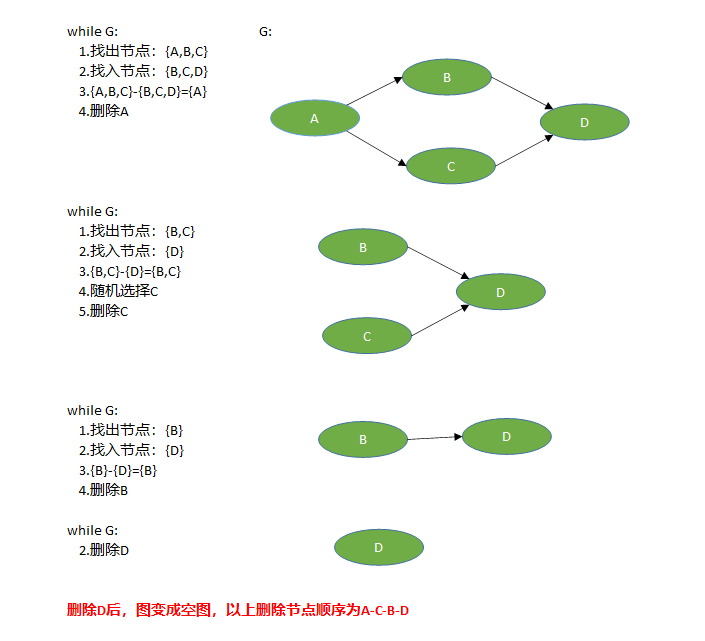

In [2]:
# 使用变量避免打字错误导致图画错的情况，提升代码的可维护性

node_x, node_k1, node_b1 = 'x', 'k1', 'b1'
node_k2, node_b2 = 'k2', 'b2'
node_linear_01, node_linear_02, node_sigmoid = 'linear_01', 'linear_02', 'sigmoid'
node_loss,node_y_ture = 'loss','y_ture'

computing_graph = { # represent model 
    node_x: [node_linear_01],
    node_k1: [node_linear_01],
    node_b1: [node_linear_01],
    node_linear_01: [node_sigmoid],
    node_sigmoid: [node_linear_02],
    node_k2: [node_linear_02],
    node_b2: [node_linear_02],
    node_linear_02: [node_loss],
    node_y_ture:[node_loss],
}

In [3]:
computing_graph

{'x': ['linear_01'],
 'k1': ['linear_01'],
 'b1': ['linear_01'],
 'linear_01': ['sigmoid'],
 'sigmoid': ['linear_02'],
 'k2': ['linear_02'],
 'b2': ['linear_02'],
 'linear_02': ['loss'],
 'y_ture': ['loss']}

In [4]:
# 出节点
set(computing_graph.keys())

{'b1', 'b2', 'k1', 'k2', 'linear_01', 'linear_02', 'sigmoid', 'x', 'y_ture'}

In [5]:
computing_graph.values()

dict_values([['linear_01'], ['linear_01'], ['linear_01'], ['sigmoid'], ['linear_02'], ['linear_02'], ['linear_02'], ['loss'], ['loss']])

In [6]:
# 对values需要做处理
from functools import reduce
reduce(lambda x, y: x+y,computing_graph.values())

['linear_01',
 'linear_01',
 'linear_01',
 'sigmoid',
 'linear_02',
 'linear_02',
 'linear_02',
 'loss',
 'loss']

In [7]:
# or
from operator import add
reduce(add,computing_graph.values())

['linear_01',
 'linear_01',
 'linear_01',
 'sigmoid',
 'linear_02',
 'linear_02',
 'linear_02',
 'loss',
 'loss']

In [8]:
# 入节点
set(reduce(add,computing_graph.values()))

{'linear_01', 'linear_02', 'loss', 'sigmoid'}

In [9]:
# 入节点
set(reduce(lambda x, y: x+y,computing_graph.values()))

{'linear_01', 'linear_02', 'loss', 'sigmoid'}

In [10]:
# 出节点-入节点=只有输出没有输入节点
set(computing_graph.keys())-set(reduce(add,computing_graph.values()))

{'b1', 'b2', 'k1', 'k2', 'x', 'y_ture'}

In [11]:
import random

In [57]:
# 使用变量避免打字错误导致图画错的情况，提升代码的可维护性

node_x, node_k1, node_b1 = 'x', 'k1', 'b1'
node_k2, node_b2 = 'k2', 'b2'
node_linear_01, node_linear_02, node_sigmoid = 'linear_01', 'linear_02', 'sigmoid'
node_loss,node_y_ture = 'loss','y_ture'

computing_graph = { # represent model 
    node_x: [node_linear_01],
    node_k1: [node_linear_01],
    node_b1: [node_linear_01],
    node_linear_01: [node_sigmoid],
    node_sigmoid: [node_linear_02],
    node_k2: [node_linear_02],
    node_b2: [node_linear_02],
    node_linear_02: [node_loss],
    node_y_ture:[node_loss],
}

In [26]:
def topologic(graph):
    while graph:
        all_nodes_have_output = set(graph.keys()) # 找出节点
        all_nodes_have_inputs = set(reduce(add,graph.values())) # 找入节点
        
        nodes_only_have_output_no_input = all_nodes_have_output - all_nodes_have_inputs # 出节点-入节点=只有输出没有输入节点
        
        if nodes_only_have_output_no_input:
            n = random.choice(list(nodes_only_have_output_no_input)) # 从只有输出没有输入节点中随机选取
            print(f'Get node : {n}')
            
            graph.pop(n) # 删除图中随机选中的节点，删的是出节点
            for _, links in graph.items():
                if n in links: links.remove(n) # 删除图中随机选中的节点，删的是入节点
        else:
            raise TypeError('This graph cannot get toplogic, which has a circle') # 图非空，但是所有的点都不是只有输出没有输入的点，存在圈

In [29]:
topologic(computing_graph)

In [15]:
%matplotlib inline

In [16]:
import networkx as nx

#### 结合图可以看出，上边topologic的输出少了loss

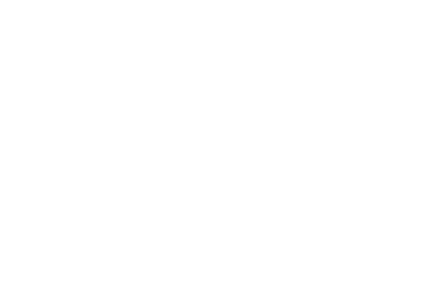

In [28]:
nx.draw(nx.DiGraph(computing_graph),with_labels=True)

In [30]:
# 使用变量避免打字错误导致图画错的情况，提升代码的可维护性

node_x, node_k1, node_b1 = 'x', 'k1', 'b1'
node_k2, node_b2 = 'k2', 'b2'
node_linear_01, node_linear_02, node_sigmoid = 'linear_01', 'linear_02', 'sigmoid'
node_loss,node_y_ture = 'loss','y_ture'

computing_graph = { # represent model 
    node_x: [node_linear_01],
    node_k1: [node_linear_01],
    node_b1: [node_linear_01],
    node_linear_01: [node_sigmoid],
    node_sigmoid: [node_linear_02],
    node_k2: [node_linear_02],
    node_b2: [node_linear_02],
    node_linear_02: [node_loss],
    node_y_ture:[node_loss],
}

graph = nx.DiGraph(computing_graph)
layout = nx.layout.spring_layout(graph)

In [31]:
def topologic(graph):
    order = []
    
    while graph:
        all_nodes_have_output = set(graph.keys()) # 找出节点
        all_nodes_have_inputs = set(reduce(add,graph.values())) # 找入节点
        
        nodes_only_have_output_no_input = all_nodes_have_output - all_nodes_have_inputs # 出节点-入节点=只有输出没有输入节点
        
        if nodes_only_have_output_no_input:
            n = random.choice(list(nodes_only_have_output_no_input)) # 从只有输出没有输入节点中随机选取
            
            order.append(n)
            print(f'Get node : {n}')
            
            graph.pop(n) # 删除图中随机选中的节点，删的是出节点
            for _, links in graph.items():
                if n in links: links.remove(n) # 删除图中随机选中的节点，删的是入节点
        else:
            raise TypeError('This graph cannot get toplogic, which has a circle') # 图非空，但是所有的点都不是只有输出没有输入的点，存在圈
    
    return order

In [32]:
order = topologic(computing_graph)

Get node : b2
Get node : y_ture
Get node : x
Get node : k2
Get node : k1
Get node : b1
Get node : linear_01
Get node : sigmoid
Get node : linear_02


In [33]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [34]:
%matplotlib notebook

<IPython.core.display.Javascript object>


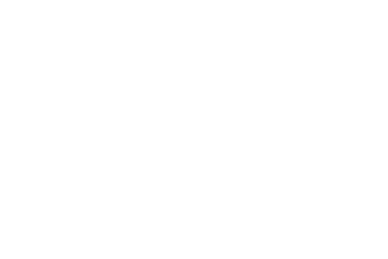

<IPython.core.display.Javascript object>


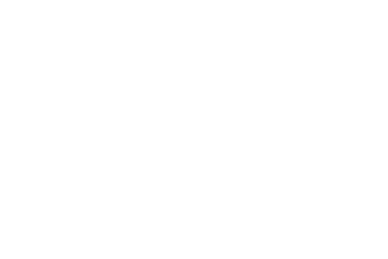

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [35]:
color = ['red','green']
before,changed = color

def animate(step):
    map_colors=[changed if node in order[:step] else before for node in graph]
    nx.draw(graph, layout, node_color=map_colors, with_labels=True)
    
ax = plt.gca()
fig = plt.gcf()
ani = FuncAnimation(fig,animate,interval=600)
plt.show()

#### 上图运行到最后，loss不在order里 

In [58]:
# 使用变量避免打字错误导致图画错的情况，提升代码的可维护性

node_x, node_k1, node_b1 = 'x', 'k1', 'b1'
node_k2, node_b2 = 'k2', 'b2'
node_linear_01, node_linear_02, node_sigmoid = 'linear_01', 'linear_02', 'sigmoid'
node_loss,node_y_ture = 'loss','y_ture'

computing_graph = { # represent model 
    node_x: [node_linear_01],
    node_k1: [node_linear_01],
    node_b1: [node_linear_01],
    node_linear_01: [node_sigmoid],
    node_sigmoid: [node_linear_02],
    node_k2: [node_linear_02],
    node_b2: [node_linear_02],
    node_linear_02: [node_loss],
    node_y_ture:[node_loss],
}

graph = nx.DiGraph(computing_graph)
layout = nx.layout.spring_layout(graph)

In [59]:
def topologic(graph):
    order = []
    
    while graph:
        all_nodes_have_output = set(graph.keys()) # 找出节点
        all_nodes_have_inputs = set(reduce(add,graph.values())) # 找入节点
        
        nodes_only_have_output_no_input = all_nodes_have_output - all_nodes_have_inputs # 出节点-入节点=只有输出没有输入节点
        
        if nodes_only_have_output_no_input:
            n = random.choice(list(nodes_only_have_output_no_input)) # 从只有输出没有输入节点中随机选取
            
            print(f'Get node : {n}')
            
            order.append(n)
            # 当凸剩余最后一个的时候node_linear_02: [node_loss]，把linear_02和loss都加到order中
            if len(graph) == 1: order += graph[n]
                
            graph.pop(n) # 删除图中随机选中的节点，删的是出节点
            
            for _, links in graph.items():
                if n in links: links.remove(n) # 删除图中随机选中的节点，删的是入节点
        else:
            raise TypeError('This graph cannot get toplogic, which has a circle') # 图非空，但是所有的点都不是只有输出没有输入的点，存在圈
    
    return order

In [38]:
%matplotlib notebook

Get node : k2
Get node : k1
Get node : b1
Get node : x
Get node : linear_01
Get node : b2
Get node : y_ture
Get node : sigmoid
Get node : linear_02


<IPython.core.display.Javascript object>


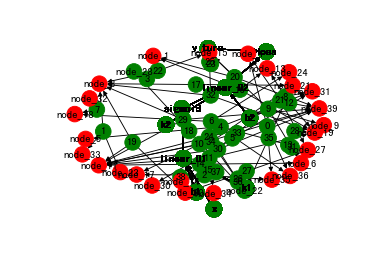

In [39]:
graph = nx.DiGraph(computing_graph)
layout = nx.layout.spring_layout(graph)

order = topologic(computing_graph)

color = ['red','green']
before,changed = color

def animate(step):
    map_colors=[changed if node in order[:step] else before for node in graph]
    nx.draw(graph, layout, node_color=map_colors, with_labels=True)
    
ax = plt.gca()
fig = plt.gcf()
ani = FuncAnimation(fig,animate,interval=600)
plt.show()

#### 上图肉眼也可以得到，为什么要让计算机自动获得拓扑排序 ？
+ 当图很复杂的时候，肉眼不够用
+ 现实生活中的实例远远要比下图更复杂

In [40]:
from collections import defaultdict

In [41]:
nodes = [f'node_{i}' for i in range(40)]
random.shuffle(nodes) # 对nodes进行打乱排序操作

random_group  = defaultdict()

for i, n in enumerate(nodes):
    if i < len(nodes)-1:
        random_group[i] = random.sample(nodes[i+1:],k=random.randint(1,min(len(nodes)-(i+1),3)))

In [42]:
graph = nx.DiGraph(random_group)
layout = nx.layout.spring_layout(graph)

order = topologic(random_group)

Get node : 8
Get node : 22
Get node : 16
Get node : 14
Get node : 26
Get node : 13
Get node : 1
Get node : 0
Get node : 4
Get node : 28
Get node : 25
Get node : 33
Get node : 34
Get node : 6
Get node : 5
Get node : 21
Get node : 31
Get node : 37
Get node : 3
Get node : 24
Get node : 9
Get node : 15
Get node : 32
Get node : 11
Get node : 36
Get node : 2
Get node : 23
Get node : 38
Get node : 35
Get node : 30
Get node : 27
Get node : 7
Get node : 17
Get node : 19
Get node : 29
Get node : 10
Get node : 12
Get node : 20
Get node : 18


In [43]:
%matplotlib inline

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


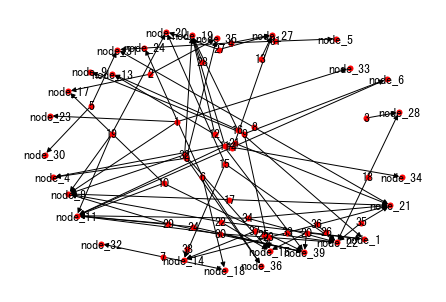

In [44]:
nx.draw(graph,with_labels=True,node_size=25)

In [45]:
%matplotlib notebook

<IPython.core.display.Javascript object>


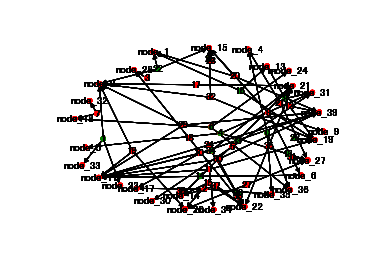

In [46]:
color = ['red','green']
before,changed = color

def animate(step):
    map_colors=[changed if node in order[:step] else before for node in graph]
    nx.draw(graph, layout, node_color=map_colors, with_labels=True, node_size=25)
    
ax = plt.gca()
fig = plt.gcf()
ani = FuncAnimation(fig,animate,interval=50)
plt.show()

In [48]:
import numpy as np

In [52]:
%matplotlib inline

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


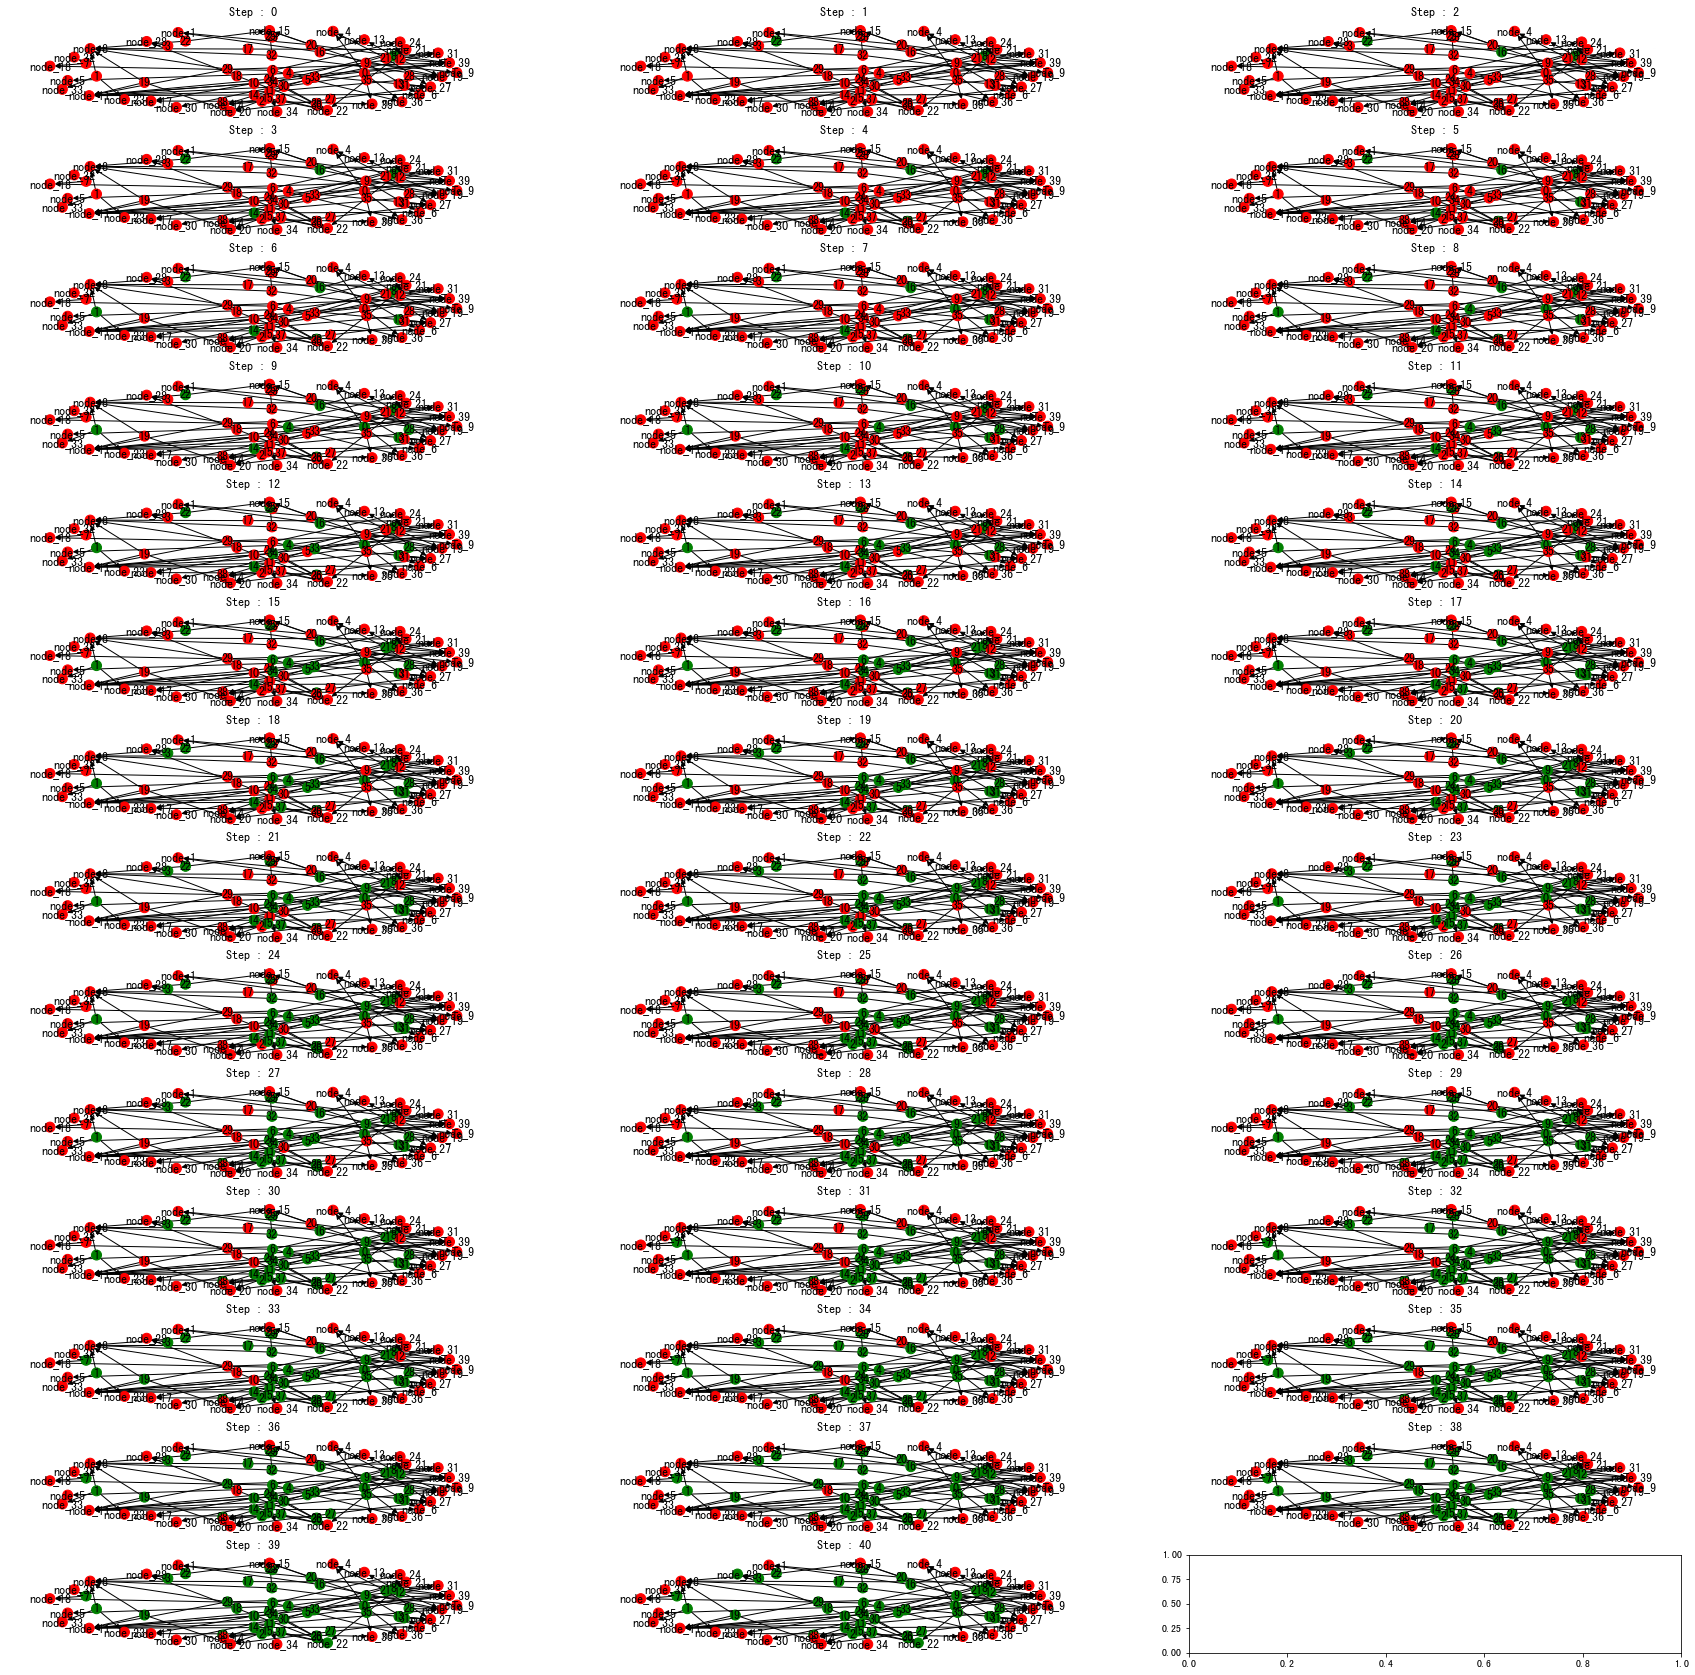

In [54]:
color = ['red','green']
before,changed = color

width = 3
fig, ax = plt.subplots(len(order)//width + 1, width, figsize = (30,30))

for i,node in  enumerate(order):
    ix = np.unravel_index(i, ax.shape)
    plt.sca(ax[ix])
    ax[ix].set_title(f'Step : {i}')
    
    map_colors=[changed if node in order[:i+1] else before for node in graph]
    nx.draw(graph, layout, node_color=map_colors, with_labels=True, node_size=100)

## 拓扑排序已经OK
## Next : Forward and Backward

In [80]:
def topologic(graph):
    order = []
    
    while graph:
        all_nodes_have_output = set(graph.keys()) # 找出节点
        all_nodes_have_inputs = set(reduce(add,graph.values())) # 找入节点
        
        nodes_only_have_output_no_input = all_nodes_have_output - all_nodes_have_inputs # 出节点-入节点=只有输出没有输入节点
        
        if nodes_only_have_output_no_input:
            n = random.choice(list(nodes_only_have_output_no_input)) # 从只有输出没有输入节点中随机选取
            
#             print(f'Get node : {n}')
            
            order.append(n)
            # 当凸剩余最后一个的时候node_linear_02: [node_loss]，把linear_02和loss都加到order中
            if len(graph) == 1: order += graph[n]
                
            graph.pop(n) # 删除图中随机选中的节点，删的是出节点
            
            for _, links in graph.items():
                if n in links: links.remove(n) # 删除图中随机选中的节点，删的是入节点
        else:
            raise TypeError('This graph cannot get toplogic, which has a circle') # 图非空，但是所有的点都不是只有输出没有输入的点，存在圈
    
    return order

In [60]:
order = topologic(computing_graph)

Get node : x
Get node : k1
Get node : y_ture
Get node : k2
Get node : b2
Get node : b1
Get node : linear_01
Get node : sigmoid
Get node : linear_02


In [61]:
order

['x',
 'k1',
 'y_ture',
 'k2',
 'b2',
 'b1',
 'linear_01',
 'sigmoid',
 'linear_02',
 'loss']

In [92]:
class Node:
    def __init__(self, name, inputs=[]):
        self.name = name
        self.inputs = inputs
        self.outputs = []
        self.value = None
        self.gradients = dict() # 用于存储 loss for each key's partial
        
        for node in self.inputs:
            node.outputs.append(self)
        
    def forward(self):
        print('Get self value'.format(self))
        
    def backward(self):
        pass
        
    def __repr__(self):
        return self.name
    
class Placeholder(Node):
    def __init__(self, name):
        Node.__init__(self, name=name)
        
    def forward(self):        
        print('::=>Get myself value by human being BABA')
        
    def backward(self):
        print('I get ∂loss/∂self from computer memory directly')
        
    def __repr__(self):
        return f'Placeholder:{self.name}'

class Linear(Node): # Linear
    def __init__(self, name, inputs=[]):
        Node.__init__(self, name=name, inputs=inputs)
        
    def forward(self):
        x,k,b = self.inputs[0],self.inputs[1],self.inputs[2]
        
        self.value = k.value*x.value + b.value
        
        print('::=>Get myself value by caculate: {}'.format(self.inputs))
        
    def backward(self):
        print('Get Gradients ∂loss/∂{}, save to MEMORY'.format(self.inputs))
        
#         x,k,b = self.inputs[0],self.inputs[1],self.inputs[2]
#         self.gradients[x] = self.gradients[]
        
        if self.outputs:
            for n in self.inputs:
                print('==:> ∂loss / ∂{} = ∂loss / ∂{} * ∂{} / ∂{}'.format(n,self,self,n))
                
                
        else:
            print('I am the final node')
            
    def __repr__(self):
        return f'Linear:{self.name}'
            
class Sigmoid(Node):
    def __init__(self, name, inputs=[]):
        Node.__init__(self, name=name, inputs=inputs)
        
    def _sigmoid(self,x):
        return 1/(1 + np.exp(-x))
        
    def forward(self):
        x= self.inputs[0]
        
        self.value = self._sigmoid(x.value)
        
        print('::=>Get myself value by caculate: {}'.format(self.inputs))
        
    def backward(self):
        print('Get Gradients ∂loss/∂{}, save to MEMORY'.format(self.inputs))
        
#         x,k,b = self.inputs[0],self.inputs[1],self.inputs[2]
#         self.gradients[x] = self.gradients[]
        
        if self.outputs:
            for n in self.inputs:
                print('==:> ∂loss / ∂{} = ∂loss / ∂{} * ∂{} / ∂{}'.format(n,self,self,n))
                
                
        else:
            print('I am the final node')

class Loss(Node):
    def __init__(self, name, inputs=[]):
        Node.__init__(self, name=name, inputs=inputs)
        
    def _sigmoid(self,x):
        return 1/(1 + np.exp(-x))
        
    def forward(self):
        y,yhat = self.inputs[0], self.inputs[1]
        
        self.value = np.mean((y.value - yhat.value)**2)
        
        print('::=>Get myself value by caculate: {}'.format(self.inputs))
        
    def backward(self):
        print('Get Gradients ∂loss/∂{}, save to MEMORY'.format(self.inputs))
        
#         x,k,b = self.inputs[0],self.inputs[1],self.inputs[2]
#         self.gradients[x] = self.gradients[]

#         ∂loss/∂[Placeholder:y_ture, Linear:linear_02]
        
        if self.outputs:
            for n in self.inputs:
                print('==:> ∂loss / ∂{} = ∂loss / ∂{} * ∂{} / ∂{}'.format(n,self,self,n))
                
                
        else:
            print('I am the final node')

In [75]:
node_x = Placeholder('x')
node_k1 =  Placeholder('k1')
node_b1 = Placeholder('b1')
node_k2 = Placeholder('k2')
node_b2 = Placeholder('b2')
node_linear_01 = Linear('linear_01', inputs = [node_x,node_k1,node_b1])
node_sigmoid = Sigmoid('sigmoid',inputs = [node_linear_01])
node_linear_02 = Linear('linear_02', inputs = [node_sigmoid,node_k2,node_b2])
node_y_ture = Placeholder('y_ture')
node_loss = Loss('loss',inputs = [node_y_ture,node_linear_02])

In [68]:
# 信息冗余，链接关系在上边cell已经写了
# computing_graph = { # represent model 
#     node_x: [node_linear_01],
#     node_k1: [node_linear_01],
#     node_b1: [node_linear_01],
#     node_linear_01: [node_sigmoid],
#     node_sigmoid: [node_linear_02],
#     node_k2: [node_linear_02],
#     node_b2: [node_linear_02],
#     node_linear_02: [node_loss],
#     node_y_ture:[node_loss],
# }

# order = topologic(computing_graph)

In [76]:
def convert_all_placeholder_to_graph(all_placeholder):
    computing_graph = defaultdict(list)
    
    while all_placeholder:
        n = all_placeholder.pop(0)
        
        if n in computing_graph: continue
        
        for m in n.outputs:
            computing_graph[n].append(m)
            all_placeholder.append(m)
    
    return computing_graph       

In [77]:
convert_all_placeholder_to_graph([node_x,node_k1,node_b1,node_k2,node_b2,node_y_ture])

defaultdict(list,
            {Placeholder:x: [Linear:linear_01],
             Placeholder:k1: [Linear:linear_01],
             Placeholder:b1: [Linear:linear_01],
             Placeholder:k2: [Linear:linear_02],
             Placeholder:b2: [Linear:linear_02],
             Placeholder:y_ture: [loss],
             Linear:linear_01: [sigmoid],
             Linear:linear_02: [loss],
             sigmoid: [Linear:linear_02]})

In [81]:
computing_graph = convert_all_placeholder_to_graph([node_x,node_k1,node_b1,node_k2,node_b2,node_y_ture])
order = topologic(computing_graph)

In [66]:
# 前馈网络，依据x,y以及参数，来获得一次loss
for node in order:
    print(f'I am: {node}')
    node.forward()
    
print ('**'*18)

for step,node in enumerate(order[::-1]):
    print(f'step {step} : I am {node}')
    node.backward()
    
print ('**'*18)

for node in order:
    if isinstance(node, Placeholder):
#         print(node)
        print('Update node:{} value: node.value = node.value + (-1)* ∂loss / ∂{}'.format(node,node))

I am: k1
::=>Get myself value by human being BABA
I am: x
::=>Get myself value by human being BABA
I am: k2
::=>Get myself value by human being BABA
I am: b2
::=>Get myself value by human being BABA
I am: b1
::=>Get myself value by human being BABA
I am: y_ture
::=>Get myself value by human being BABA
I am: linear_01
::=>Get myself value by caculate: [x, k1, b1]
I am: sigmoid
::=>Get myself value by caculate: [linear_01]
I am: linear_02
::=>Get myself value by caculate: [k2, b2, sigmoid]
I am: loss
::=>Get myself value by caculate: [y_ture, linear_02]
************************************
step 0 : I am loss
Get Gradients ∂loss/∂[y_ture, linear_02]
I am the final node
step 1 : I am linear_02
Get Gradients ∂loss/∂[k2, b2, sigmoid]
==:> ∂loss / ∂k2 = ∂loss / ∂linear_02 * ∂linear_02 / ∂k2
==:> ∂loss / ∂b2 = ∂loss / ∂linear_02 * ∂linear_02 / ∂b2
==:> ∂loss / ∂sigmoid = ∂loss / ∂linear_02 * ∂linear_02 / ∂sigmoid
step 2 : I am sigmoid
Get Gradients ∂loss/∂[linear_01]
==:> ∂loss / ∂linear_01 = 

## 初始值 Forward

In [82]:
feed_dict = {
    node_x: 3,
    node_k1: random.random(),
    node_b1: random.random(),
    node_k2: random.random(),
    node_b2: random.random(),
    node_y_ture: 0.38
}

In [83]:
def convert_all_placeholder_to_graph(feed):
    computing_graph = defaultdict(list)
    
    need_expand = list(feed.keys())
    while need_expand:
        n = need_expand.pop(0)
        
        if n in computing_graph: continue
        
        if isinstance(n,Placeholder): n.value = feed[n]
        
        for m in n.outputs:
            computing_graph[n].append(m)
            need_expand.append(m)
    
    return computing_graph       

In [84]:
computing_graph = convert_all_placeholder_to_graph(feed_dict)

order = topologic(computing_graph)

In [86]:
order

[Placeholder:k2,
 Placeholder:k1,
 Placeholder:b1,
 Placeholder:x,
 Linear:linear_01,
 Placeholder:b2,
 sigmoid,
 Placeholder:y_ture,
 Linear:linear_02,
 loss]

In [88]:
node_k1.value

0.9064123803626702

In [94]:
# 前馈网络，依据x,y以及参数，来获得一次loss
for node in order:
    print(f'I am: {node}')
    node.forward()
    print(f'My value is : {node.value}')
    
print ('**'*18)

for step,node in enumerate(order[::-1]):
    print(f'step {step} : I am {node}')
    node.backward()
    
print ('**'*18)

for node in order:
    if isinstance(node, Placeholder):
#         print(node)
        print('Update node:{} value: node.value = node.value + (-1)* ∂loss / ∂{}'.format(node,node))

I am: Placeholder:k2
::=>Get myself value by human being BABA
My value is : 0.0774923949295433
I am: Placeholder:k1
::=>Get myself value by human being BABA
My value is : 0.9064123803626702
I am: Placeholder:b1
::=>Get myself value by human being BABA
My value is : 0.4094373328627935
I am: Placeholder:x
::=>Get myself value by human being BABA
My value is : 3
I am: Linear:linear_01
::=>Get myself value by caculate: [Placeholder:x, Placeholder:k1, Placeholder:b1]
My value is : 3.128674473950804
I am: Placeholder:b2
::=>Get myself value by human being BABA
My value is : 0.5293759938120399
I am: sigmoid
::=>Get myself value by caculate: [Linear:linear_01]
My value is : 0.9580601644580521
I am: Placeholder:y_ture
::=>Get myself value by human being BABA
My value is : 0.38
I am: Linear:linear_02
::=>Get myself value by caculate: [sigmoid, Placeholder:k2, Placeholder:b2]
My value is : 0.6036183704424865
I am: loss
::=>Get myself value by caculate: [Placeholder:y_ture, Linear:linear_02]
My va

## Backward

In [142]:
class Node:
    def __init__(self, name, inputs=[]):
        self.name = name
        self.inputs = inputs
        self.outputs = []
        self.value = None
        self.gradients = dict() # 用于存储 loss for each key's partial
        
        for node in self.inputs:
            node.outputs.append(self)
        
    def forward(self):
        print('Get self value'.format(self))
        
    def backward(self):
        pass
        
    def __repr__(self):
        return self.name
    
class Placeholder(Node):
    def __init__(self, name):
        Node.__init__(self, name=name)
        
    def forward(self):   
        pass
#         print('::=>Get myself value by human being BABA')
        
    def backward(self):
#         print('I get ∂loss/∂self from computer memory directly')
        self.gradients[self] = self.outputs[0].gradients[self]
        
    def __repr__(self):
        return f'Placeholder:{self.name}'

class Linear(Node): # Linear
    def __init__(self, name, inputs=[]):
        Node.__init__(self, name=name, inputs=inputs)
        
    def forward(self):
        x,k,b = self.inputs[0],self.inputs[1],self.inputs[2]
        
        self.value = k.value*x.value + b.value
        
#         print('::=>Get myself value by caculate: {}'.format(self.inputs))
        
    def backward(self):
#         print('Get Gradients ∂loss/∂{}, save to MEMORY'.format(self.inputs))
        
        x,k,b = self.inputs[0],self.inputs[1],self.inputs[2]

#         ∂loss / ∂Placeholder:k2 = ∂loss / ∂Linear:linear_02 * ∂Linear:linear_02 / ∂Placeholder:k2

        self.gradients[k] = self.outputs[0].gradients[self] * x.value
        self.gradients[b] = self.outputs[0].gradients[self] * 1
        self.gradients[x] = self.outputs[0].gradients[self] * k.value
            
    def __repr__(self):
        return f'Linear:{self.name}'
            
class Sigmoid(Node):
    def __init__(self, name, inputs=[]):
        Node.__init__(self, name=name, inputs=inputs)
        
    def _sigmoid(self,x):
        return 1/(1 + np.exp(-x))
        
    def forward(self):
        x= self.inputs[0]
        
        self.value = self._sigmoid(x.value)
        
#         print('::=>Get myself value by caculate: {}'.format(self.inputs))
        
    def backward(self):
#         print('Get Gradients ∂loss/∂{}, save to MEMORY'.format(self.inputs))
        
        x = self.inputs[0]
        
        self.gradients[x] = self.outputs[0].gradients[self] * self._sigmoid(x.value) * (1 - self._sigmoid(x.value))

class Loss(Node):
    def __init__(self, name, inputs=[]):
        Node.__init__(self, name=name, inputs=inputs)
        
    def _sigmoid(self,x):
        return 1/(1 + np.exp(-x))
        
    def forward(self):
        y,yhat = self.inputs[0], self.inputs[1]
        
        self.value = np.mean((y.value - yhat.value)**2)
        
#         print('::=>Get myself value by caculate: {}'.format(self.inputs))
        
    def backward(self):
#         print('Get Gradients ∂loss/∂{}, save to self.gradients'.format(self.inputs))

#         ∂loss/∂[Placeholder:y_ture, Linear:linear_02]
        
        y,yhat = self.inputs[0], self.inputs[1]
        
        self.gradients[y] = 2 * np.mean((y.value - yhat.value))
        self.gradients[yhat] = -2 * np.mean((y.value - yhat.value))

In [143]:
node_x = Placeholder('x')
node_k1 =  Placeholder('k1')
node_b1 = Placeholder('b1')
node_k2 = Placeholder('k2')
node_b2 = Placeholder('b2')
node_linear_01 = Linear('linear_01', inputs = [node_x,node_k1,node_b1])
node_sigmoid = Sigmoid('sigmoid',inputs = [node_linear_01])
node_linear_02 = Linear('linear_02', inputs = [node_sigmoid,node_k2,node_b2])
node_y_ture = Placeholder('y_ture')
node_loss = Loss('loss',inputs = [node_y_ture,node_linear_02])

In [144]:
def topologic(graph):
    order = []
    
    while graph:
        all_nodes_have_output = set(graph.keys()) # 找出节点
        all_nodes_have_inputs = set(reduce(add,graph.values())) # 找入节点
        
        nodes_only_have_output_no_input = all_nodes_have_output - all_nodes_have_inputs # 出节点-入节点=只有输出没有输入节点
        
        if nodes_only_have_output_no_input:
            n = random.choice(list(nodes_only_have_output_no_input)) # 从只有输出没有输入节点中随机选取
            
#             print(f'Get node : {n}')
            
            order.append(n)
            # 当凸剩余最后一个的时候node_linear_02: [node_loss]，把linear_02和loss都加到order中
            if len(graph) == 1: order += graph[n]
                
            graph.pop(n) # 删除图中随机选中的节点，删的是出节点
            
            for _, links in graph.items():
                if n in links: links.remove(n) # 删除图中随机选中的节点，删的是入节点
        else:
            raise TypeError('This graph cannot get toplogic, which has a circle') # 图非空，但是所有的点都不是只有输出没有输入的点，存在圈
    
    return order

feed_dict = {
    node_x: 3,
    node_k1: random.random(),
    node_b1: random.random(),
    node_k2: random.random(),
    node_b2: random.random(),
    node_y_ture: 0.38
}

def convert_all_placeholder_to_graph(feed):
    computing_graph = defaultdict(list)
    
    need_expand = list(feed.keys())
    while need_expand:
        n = need_expand.pop(0)
        
        if n in computing_graph: continue
        
        if isinstance(n,Placeholder): n.value = feed[n]
        
        for m in n.outputs:
            computing_graph[n].append(m)
            need_expand.append(m)
    
    return computing_graph   


computing_graph = convert_all_placeholder_to_graph(feed_dict)

order = topologic(computing_graph)

In [145]:
order

[Placeholder:k1,
 Placeholder:k2,
 Placeholder:x,
 Placeholder:b1,
 Linear:linear_01,
 Placeholder:y_ture,
 sigmoid,
 Placeholder:b2,
 Linear:linear_02,
 loss]

In [146]:
# 前馈网络，依据x,y以及参数，来获得一次loss
for node in order:
    print(f'I am: {node}')
    node.forward()
    print(f'My value is : {node.value}')
    
print ('**'*18)

for step,node in enumerate(order[::-1]):
    print(f'=>step {step} : I am {node}')
    node.backward()
    print(f'Get gradients: {node.gradients}')
    
print ('**'*18)

for node in order:
    if isinstance(node, Placeholder):
#         print(node)
        print('Update node:{} value: node.value = node.value + (-1)* ∂loss / ∂{}'.format(node,node))

I am: Placeholder:k1
My value is : 0.2172553818853481
I am: Placeholder:k2
My value is : 0.18375844149487963
I am: Placeholder:x
My value is : 3
I am: Placeholder:b1
My value is : 0.21759521783929336
I am: Linear:linear_01
My value is : 0.8693613634953377
I am: Placeholder:y_ture
My value is : 0.38
I am: sigmoid
My value is : 0.7046127936518526
I am: Placeholder:b2
My value is : 0.07126638525948537
I am: Linear:linear_02
My value is : 0.20074493407830302
I am: loss
My value is : 0.032132378658591934
************************************
=>step 0 : I am loss
Get gradients: {Placeholder:y_ture: 0.358510131843394, Linear:linear_02: -0.358510131843394}
=>step 1 : I am Linear:linear_02
Get gradients: {Placeholder:k2: -0.25261082555066783, Placeholder:b2: -0.358510131843394, sigmoid: -0.0658792630876659}
=>step 2 : I am Placeholder:b2
Get gradients: {Placeholder:b2: -0.358510131843394}
=>step 3 : I am sigmoid
Get gradients: {Linear:linear_01: -0.013711688499701667}
=>step 4 : I am Placeholder

## optimize 更新

In [149]:
class Node:
    def __init__(self, name, inputs=[], is_trainable=False): # is_trainable判断是否要更新，x,y不更新
        self.name = name
        self.inputs = inputs
        self.outputs = []
        self.value = None
        self.gradients = dict() # 用于存储 loss for each key's partial
        self.is_trainable = is_trainable
        
        for node in self.inputs:
            node.outputs.append(self)
        
    def forward(self):
        print('Get self value'.format(self))
        
    def backward(self):
        pass
        
    def __repr__(self):
        return self.name
    
class Placeholder(Node):
    def __init__(self, name, is_trainable=True):
        Node.__init__(self, name=name,is_trainable=is_trainable)
        
    def forward(self):   
        pass
#         print('::=>Get myself value by human being BABA')
        
    def backward(self):
#         print('I get ∂loss/∂self from computer memory directly')
        self.gradients[self] = self.outputs[0].gradients[self]
        
    def __repr__(self):
        return f'Placeholder:{self.name}'

class Linear(Node): # Linear
    def __init__(self, name, inputs=[]):
        Node.__init__(self, name=name, inputs=inputs)
        
    def forward(self):
        x,k,b = self.inputs[0],self.inputs[1],self.inputs[2]
        
        self.value = k.value*x.value + b.value
        
#         print('::=>Get myself value by caculate: {}'.format(self.inputs))
        
    def backward(self):
#         print('Get Gradients ∂loss/∂{}, save to MEMORY'.format(self.inputs))
        
        x,k,b = self.inputs[0],self.inputs[1],self.inputs[2]

#         ∂loss / ∂Placeholder:k2 = ∂loss / ∂Linear:linear_02 * ∂Linear:linear_02 / ∂Placeholder:k2

        self.gradients[k] = self.outputs[0].gradients[self] * x.value
        self.gradients[b] = self.outputs[0].gradients[self] * 1
        self.gradients[x] = self.outputs[0].gradients[self] * k.value
            
    def __repr__(self):
        return f'Linear:{self.name}'
            
class Sigmoid(Node):
    def __init__(self, name, inputs=[]):
        Node.__init__(self, name=name, inputs=inputs)
        
    def _sigmoid(self,x):
        return 1/(1 + np.exp(-x))
        
    def forward(self):
        x= self.inputs[0]
        
        self.value = self._sigmoid(x.value)
        
#         print('::=>Get myself value by caculate: {}'.format(self.inputs))
        
    def backward(self):
#         print('Get Gradients ∂loss/∂{}, save to MEMORY'.format(self.inputs))
        
        x = self.inputs[0]
        
        self.gradients[x] = self.outputs[0].gradients[self] * self._sigmoid(x.value) * (1 - self._sigmoid(x.value))

class Loss(Node):
    def __init__(self, name, inputs=[]):
        Node.__init__(self, name=name, inputs=inputs)
        
    def _sigmoid(self,x):
        return 1/(1 + np.exp(-x))
        
    def forward(self):
        y,yhat = self.inputs[0], self.inputs[1]
        
        self.value = np.mean((y.value - yhat.value)**2)
        
#         print('::=>Get myself value by caculate: {}'.format(self.inputs))
        
    def backward(self):
#         print('Get Gradients ∂loss/∂{}, save to self.gradients'.format(self.inputs))

#         ∂loss/∂[Placeholder:y_ture, Linear:linear_02]
        
        y,yhat = self.inputs[0], self.inputs[1]
        
        self.gradients[y] = 2 * np.mean((y.value - yhat.value))
        self.gradients[yhat] = -2 * np.mean((y.value - yhat.value))

In [150]:
node_x = Placeholder('x',is_trainable=False)
node_k1 =  Placeholder('k1',is_trainable=True)
node_b1 = Placeholder('b1',is_trainable=True)
node_k2 = Placeholder('k2',is_trainable=True)
node_b2 = Placeholder('b2',is_trainable=True)
node_linear_01 = Linear('linear_01', inputs = [node_x,node_k1,node_b1])
node_sigmoid = Sigmoid('sigmoid',inputs = [node_linear_01])
node_linear_02 = Linear('linear_02', inputs = [node_sigmoid,node_k2,node_b2])
node_y_ture = Placeholder('y_ture',is_trainable=False)
node_loss = Loss('loss',inputs = [node_y_ture,node_linear_02])

In [151]:
def topologic(graph):
    order = []
    
    while graph:
        all_nodes_have_output = set(graph.keys()) # 找出节点
        all_nodes_have_inputs = set(reduce(add,graph.values())) # 找入节点
        
        nodes_only_have_output_no_input = all_nodes_have_output - all_nodes_have_inputs # 出节点-入节点=只有输出没有输入节点
        
        if nodes_only_have_output_no_input:
            n = random.choice(list(nodes_only_have_output_no_input)) # 从只有输出没有输入节点中随机选取
            
#             print(f'Get node : {n}')
            
            order.append(n)
            # 当凸剩余最后一个的时候node_linear_02: [node_loss]，把linear_02和loss都加到order中
            if len(graph) == 1: order += graph[n]
                
            graph.pop(n) # 删除图中随机选中的节点，删的是出节点
            
            for _, links in graph.items():
                if n in links: links.remove(n) # 删除图中随机选中的节点，删的是入节点
        else:
            raise TypeError('This graph cannot get toplogic, which has a circle') # 图非空，但是所有的点都不是只有输出没有输入的点，存在圈
    
    return order

feed_dict = {
    node_x: 3,
    node_k1: random.random(),
    node_b1: random.random(),
    node_k2: random.random(),
    node_b2: random.random(),
    node_y_ture: 0.38
}

def convert_all_placeholder_to_graph(feed):
    computing_graph = defaultdict(list)
    
    need_expand = list(feed.keys())
    while need_expand:
        n = need_expand.pop(0)
        
        if n in computing_graph: continue
        
        if isinstance(n,Placeholder): n.value = feed[n]
        
        for m in n.outputs:
            computing_graph[n].append(m)
            need_expand.append(m)
    
    return computing_graph   


computing_graph = convert_all_placeholder_to_graph(feed_dict)

order = topologic(computing_graph)

In [153]:
# 前馈网络，依据x,y以及参数，来获得一次loss
for node in order:
    print(f'I am: {node}')
    node.forward()
    print(f'My value is : {node.value}')
    
print ('**'*18)

for step,node in enumerate(order[::-1]):
    print(f'=>step {step} : I am {node}')
    node.backward()
    print(f'Get gradients: {node.gradients}')
    
print ('**'*18)

learning_rate = 1e-3

for node in order: # 依据偏导数来更新每个参数的过程叫做 optimize 优化
    if node.is_trainable:
        node.value = node.value + (-1) * node.gradients[node] * learning_rate
        print('Update node:{} value: node.value = node.value + (-1)* ∂loss / ∂{}'.format(node,node))

I am: Placeholder:b1
My value is : 0.03466943012406645
I am: Placeholder:k1
My value is : 0.47558808749963294
I am: Placeholder:x
My value is : 3
I am: Placeholder:y_ture
My value is : 0.38
I am: Placeholder:b2
My value is : 0.617979870940057
I am: Placeholder:k2
My value is : 0.3951988475474331
I am: Linear:linear_01
My value is : 1.4614336926229652
I am: sigmoid
My value is : 0.8117518564012878
I am: Linear:linear_02
My value is : 0.9387832690843354
I am: loss
My value is : 0.3122387418085768
************************************
=>step 0 : I am loss
Get gradients: {Placeholder:y_ture: -1.1175665381686708, Linear:linear_02: 1.1175665381686708}
=>step 1 : I am Linear:linear_02
Get gradients: {Placeholder:k2: 0.9071867120103791, Placeholder:b2: 1.1175665381686708, sigmoid: 0.4416610079418331}
=>step 2 : I am sigmoid
Get gradients: {Linear:linear_01: 0.06749056313258249}
=>step 3 : I am Linear:linear_01
Get gradients: {Placeholder:k1: 0.20247168939774746, Placeholder:b1: 0.06749056313258

## 函数封装

In [154]:
# 前馈网络，依据x,y以及参数，来获得一次loss
def feedforward(order_nodes):
    for node in order_nodes:
        print(f'I am: {node}')
        node.forward()
        print(f'My value is : {node.value}')

def backward(order_nodes):
    for step,node in enumerate(order_nodes[::-1]):
        print(f'=>step {step} : I am {node}')
        node.backward()
        print(f'Get gradients: {node.gradients}')

def optimize(order_nodes,learning_rate = 1e-3):
    for node in order_nodes: # 依据偏导数来更新每个参数的过程叫做 optimize 优化
        if node.is_trainable:
            node.value = node.value + (-1) * node.gradients[node] * learning_rate
            print('Update node:{} value: node.value = node.value + (-1)* ∂loss / ∂{}'.format(node,node))

In [155]:
feedforward(order)
backward(order)
optimize(order)

I am: Placeholder:b1
My value is : 0.03460193956093387
I am: Placeholder:k1
My value is : 0.4753856158102352
I am: Placeholder:x
My value is : 3
I am: Placeholder:y_ture
My value is : 0.38
I am: Placeholder:b2
My value is : 0.6168623044018884
I am: Placeholder:k2
My value is : 0.3942916608354227
I am: Linear:linear_01
My value is : 1.4607587869916394
I am: sigmoid
My value is : 0.8116487018451969
I am: Linear:linear_02
My value is : 0.9368886190673459
I am: loss
My value is : 0.31012493404673547
=>step 0 : I am loss
Get gradients: {Placeholder:y_ture: -1.1137772381346918, Linear:linear_02: 1.1137772381346918}
=>step 1 : I am Linear:linear_02
Get gradients: {Placeholder:k2: 0.9039958494767513, Placeholder:b2: 1.1137772381346918, sigmoid: 0.4391530770248177}
=>step 2 : I am sigmoid
Get gradients: {Linear:linear_01: 0.06713556469760269}
=>step 3 : I am Linear:linear_01
Get gradients: {Placeholder:k1: 0.2014066940928081, Placeholder:b1: 0.06713556469760269, Placeholder:x: 0.031915281766537

## 上边是做一次更新，下边让函数做10次更新

In [156]:
for i in range(10):
    print(f'Training Step : {i}')
    feedforward(order)
    backward(order)
    optimize(order)

Training Step : 0
I am: Placeholder:b1
My value is : 0.03453480399623626
I am: Placeholder:k1
My value is : 0.4751842091161424
I am: Placeholder:x
My value is : 3
I am: Placeholder:y_ture
My value is : 0.38
I am: Placeholder:b2
My value is : 0.6157485271637537
I am: Placeholder:k2
My value is : 0.39338766498594596
I am: Linear:linear_01
My value is : 1.4600874313446635
I am: sigmoid
My value is : 0.8115460468181409
I am: Linear:linear_02
My value is : 0.9350007315501174
I am: loss
My value is : 0.3080258120211655
=>step 0 : I am loss
Get gradients: {Placeholder:y_ture: -1.1100014631002348, Linear:linear_02: 1.1100014631002348}
=>step 1 : I am Linear:linear_02
Get gradients: {Placeholder:k2: 0.9008172993413481, Placeholder:b2: 1.1100014631002348, sigmoid: 0.43666088369998507}
=>step 2 : I am sigmoid
Get gradients: {Linear:linear_01: 0.06678250540274268}
=>step 3 : I am Linear:linear_01
Get gradients: {Placeholder:k1: 0.20034751620822805, Placeholder:b1: 0.06678250540274268, Placeholder:

In [157]:
for i in range(10):
    print(f'Training Step : {i}')
    feedforward(order)
    backward(order)
    optimize(order,learning_rate=1e-1)

Training Step : 0
I am: Placeholder:b1
My value is : 0.03388255165764069
I am: Placeholder:k1
My value is : 0.4732274521003557
I am: Placeholder:x
My value is : 3
I am: Placeholder:y_ture
My value is : 0.38
I am: Placeholder:b2
My value is : 0.6048162170729041
I am: Placeholder:k2
My value is : 0.384520522568849
I am: Linear:linear_01
My value is : 1.4535649079587079
I am: sigmoid
My value is : 0.8105464705564804
I am: Linear:linear_02
My value is : 0.9164879694976181
I am: loss
My value is : 0.2878193414156772
=>step 0 : I am loss
Get gradients: {Placeholder:y_ture: -1.0729759389952362, Linear:linear_02: 1.0729759389952362}
=>step 1 : I am Linear:linear_02
Get gradients: {Placeholder:k2: 0.8696968603446142, Placeholder:b2: 1.0729759389952362, sigmoid: 0.4125812687662497}
=>step 2 : I am sigmoid
Get gradients: {Linear:linear_01: 0.06335634667432063}
=>step 3 : I am Linear:linear_01
Get gradients: {Placeholder:k1: 0.1900690400229619, Placeholder:b1: 0.06335634667432063, Placeholder:x: 0

In [184]:
class Node:
    def __init__(self, name, inputs=[], is_trainable=False): # is_trainable判断是否要更新，x,y不更新
        self.name = name
        self.inputs = inputs
        self.outputs = []
        self.value = None
        self.gradients = dict() # 用于存储 loss for each key's partial
        self.is_trainable = is_trainable
        
        for node in self.inputs:
            node.outputs.append(self)
        
    def forward(self):
        print('Get self value'.format(self))
        
    def backward(self):
        pass
        
    def __repr__(self):
        return self.name
    
class Placeholder(Node):
    def __init__(self, name, is_trainable=True):
        Node.__init__(self, name=name,is_trainable=is_trainable)
        
    def forward(self):   
        pass
#         print('::=>Get myself value by human being BABA')
        
    def backward(self):
#         print('I get ∂loss/∂self from computer memory directly')
        self.gradients[self] = self.outputs[0].gradients[self]
        
    def __repr__(self):
        return f'Placeholder:{self.name}'

class Linear(Node): # Linear
    def __init__(self, name, inputs=[]):
        Node.__init__(self, name=name, inputs=inputs)
        
    def forward(self):
        x,k,b = self.inputs[0],self.inputs[1],self.inputs[2]
        
        self.value = k.value*x.value + b.value
        
#         print('::=>Get myself value by caculate: {}'.format(self.inputs))
        
    def backward(self):
#         print('Get Gradients ∂loss/∂{}, save to MEMORY'.format(self.inputs))
        
        x,k,b = self.inputs[0],self.inputs[1],self.inputs[2]

#         ∂loss / ∂Placeholder:k2 = ∂loss / ∂Linear:linear_02 * ∂Linear:linear_02 / ∂Placeholder:k2

        self.gradients[k] = self.outputs[0].gradients[self] * x.value
        self.gradients[b] = self.outputs[0].gradients[self] * 1
        self.gradients[x] = self.outputs[0].gradients[self] * k.value
            
    def __repr__(self):
        return f'Linear:{self.name}'
            
class Sigmoid(Node):
    def __init__(self, name, inputs=[]):
        Node.__init__(self, name=name, inputs=inputs)
        
    def _sigmoid(self,x):
        return 1/(1 + np.exp(-x))
        
    def forward(self):
        x= self.inputs[0]
        
        self.value = self._sigmoid(x.value)
        
#         print('::=>Get myself value by caculate: {}'.format(self.inputs))
        
    def backward(self):
#         print('Get Gradients ∂loss/∂{}, save to MEMORY'.format(self.inputs))
        
        x = self.inputs[0]
        
        self.gradients[x] = self.outputs[0].gradients[self] * self._sigmoid(x.value) * (1 - self._sigmoid(x.value))

class Loss(Node):
    def __init__(self, name, inputs=[]):
        Node.__init__(self, name=name, inputs=inputs)
        
    def _sigmoid(self,x):
        return 1/(1 + np.exp(-x))
        
    def forward(self):
        y,yhat = self.inputs[0], self.inputs[1]
        
        self.value = np.mean((y.value - yhat.value)**2)
        
#         print('::=>Get myself value by caculate: {}'.format(self.inputs))
        
    def backward(self):
#         print('Get Gradients ∂loss/∂{}, save to self.gradients'.format(self.inputs))

#         ∂loss/∂[Placeholder:y_ture, Linear:linear_02]
        
        y,yhat = self.inputs[0], self.inputs[1]
        
        self.gradients[y] = 2 * np.mean((y.value - yhat.value))
        self.gradients[yhat] = -2 * np.mean((y.value - yhat.value))

In [185]:
node_x = Placeholder('x',is_trainable=False)
node_k1 =  Placeholder('k1',is_trainable=True)
node_b1 = Placeholder('b1',is_trainable=True)
node_k2 = Placeholder('k2',is_trainable=True)
node_b2 = Placeholder('b2',is_trainable=True)
node_linear_01 = Linear('linear_01', inputs = [node_x,node_k1,node_b1])
node_sigmoid = Sigmoid('sigmoid',inputs = [node_linear_01])
node_linear_02 = Linear('linear_02', inputs = [node_sigmoid,node_k2,node_b2])
node_y_ture = Placeholder('y_ture',is_trainable=False)
node_loss = Loss('loss',inputs = [node_y_ture,node_linear_02])

In [186]:
def topologic(graph):
    order = []
    
    while graph:
        all_nodes_have_output = set(graph.keys()) # 找出节点
        all_nodes_have_inputs = set(reduce(add,graph.values())) # 找入节点
        
        nodes_only_have_output_no_input = all_nodes_have_output - all_nodes_have_inputs # 出节点-入节点=只有输出没有输入节点
        
        if nodes_only_have_output_no_input:
            n = random.choice(list(nodes_only_have_output_no_input)) # 从只有输出没有输入节点中随机选取
            
#             print(f'Get node : {n}')
            
            order.append(n)
            # 当凸剩余最后一个的时候node_linear_02: [node_loss]，把linear_02和loss都加到order中
            if len(graph) == 1: order += graph[n]
                
            graph.pop(n) # 删除图中随机选中的节点，删的是出节点
            
            for _, links in graph.items():
                if n in links: links.remove(n) # 删除图中随机选中的节点，删的是入节点
        else:
            raise TypeError('This graph cannot get toplogic, which has a circle') # 图非空，但是所有的点都不是只有输出没有输入的点，存在圈
    
    return order

feed_dict = {
    node_x: 3,
    node_k1: random.random(),
    node_b1: random.random(),
    node_k2: random.random(),
    node_b2: random.random(),
    node_y_ture: 0.38
}

def convert_all_placeholder_to_graph(feed):
    computing_graph = defaultdict(list)
    
    need_expand = list(feed.keys())
    while need_expand:
        n = need_expand.pop(0)
        
        if n in computing_graph: continue
        
        if isinstance(n,Placeholder): n.value = feed[n]
        
        for m in n.outputs:
            computing_graph[n].append(m)
            need_expand.append(m)
    
    return computing_graph   


computing_graph = convert_all_placeholder_to_graph(feed_dict)

order = topologic(computing_graph)

In [174]:
# 前馈网络，依据x,y以及参数，来获得一次loss
def feedforward(order_nodes):
    for node in order_nodes:
#         print(f'I am: {node}')
        node.forward()
        if isinstance(node,Loss):
            print(f'My value is : {node.value}')

def backward(order_nodes):
    for step,node in enumerate(order_nodes[::-1]):
#         print(f'=>step {step} : I am {node}')
        node.backward()
#         print(f'Get gradients: {node.gradients}')

def optimize(order_nodes,learning_rate = 1e-3):
    for node in order_nodes: # 依据偏导数来更新每个参数的过程叫做 optimize 优化
        if node.is_trainable:
            node.value = node.value + (-1) * node.gradients[node] * learning_rate
#             print('Update node:{} value: node.value = node.value + (-1)* ∂loss / ∂{}'.format(node,node))

In [175]:
loss_history = []

for i in range(100):
    print(f'Training Step : {i}')
    feedforward(order)
    backward(order)
    
    loss_history.append(order[-1].value)
    
    optimize(order,learning_rate=1e-1)

Training Step : 0
My value is : 0.041755421616616044
Training Step : 1
My value is : 0.01850817830350884
Training Step : 2
My value is : 0.008211880062589891
Training Step : 3
My value is : 0.003644803535769281
Training Step : 4
My value is : 0.0016178866300976856
Training Step : 5
My value is : 0.0007181645713718155
Training Step : 6
My value is : 0.0003187788164329197
Training Step : 7
My value is : 0.00014149555668640173
Training Step : 8
My value is : 6.280377752025036e-05
Training Step : 9
My value is : 2.7875379631958505e-05
Training Step : 10
My value is : 1.237228944631897e-05
Training Step : 11
My value is : 5.491301952231096e-06
Training Step : 12
My value is : 2.4372372437581553e-06
Training Step : 13
My value is : 1.0817288192538916e-06
Training Step : 14
My value is : 4.801066483870206e-07
Training Step : 15
My value is : 2.1308662108496207e-07
Training Step : 16
My value is : 9.457450379098104e-08
Training Step : 17
My value is : 4.197508416933204e-08
Training Step : 18
M

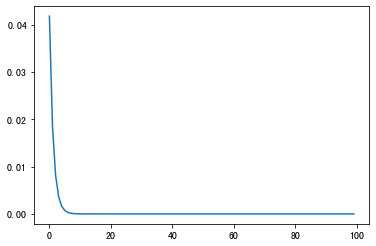

In [176]:
plt.plot(loss_history)

In [177]:
node_k1.value,node_k2.value,node_b1.value,node_b2.value

(0.216141489502379,
 -0.02417728531378066,
 0.8532719246867878,
 0.39977284520079215)

In [178]:
def sigmod(x):
    return 1/(1+np.exp(-x))

In [179]:
node_k2.value * sigmod(3 * node_k1.value + node_b1.value) + node_b2.value

0.38

In [181]:
order[-2]

Linear:linear_02

In [180]:
order[-2].value

0.38

## 在机器学习中，把forward一次，backward一次，叫做运行一个epoch

In [187]:
# 前馈网络，依据x,y以及参数，来获得一次loss
def feedforward(order_nodes):
    for node in order_nodes:
#         print(f'I am: {node}')
        node.forward()
        if isinstance(node,Loss):
            print(f'My value is : {node.value}')

def backward(order_nodes):
    for step,node in enumerate(order_nodes[::-1]):
#         print(f'=>step {step} : I am {node}')
        node.backward()
#         print(f'Get gradients: {node.gradients}')

def optimize(order_nodes,learning_rate = 1e-3):
    for node in order_nodes: # 依据偏导数来更新每个参数的过程叫做 optimize 优化
        if node.is_trainable:
            node.value = node.value + (-1) * node.gradients[node] * learning_rate
#             print('Update node:{} value: node.value = node.value + (-1)* ∂loss / ∂{}'.format(node,node))

def run_one_epoch(order_nodes):
    feedforward(order_nodes)
    backward(order_nodes)

In [188]:
loss_history = []

for i in range(100):
    print(f'Training Step : {i}')
    
    run_one_epoch(order)
    
    loss_history.append(order[-1].value)
    
    optimize(order,learning_rate=1e-1)

Training Step : 0
My value is : 0.3493480546412638
Training Step : 1
My value is : 0.13961591938908172
Training Step : 2
My value is : 0.057153917400163394
Training Step : 3
My value is : 0.023792046301052586
Training Step : 4
My value is : 0.010016095823408403
Training Step : 5
My value is : 0.0042480544429336995
Training Step : 6
My value is : 0.0018105072616475047
Training Step : 7
My value is : 0.0007741044911438817
Training Step : 8
My value is : 0.0003316723623786383
Training Step : 9
My value is : 0.0001423035140456613
Training Step : 10
My value is : 6.111010821783438e-05
Training Step : 11
My value is : 2.6258316107090646e-05
Training Step : 12
My value is : 1.1287267050069674e-05
Training Step : 13
My value is : 4.853119256372982e-06
Training Step : 14
My value is : 2.087014260751747e-06
Training Step : 15
My value is : 8.975884978087077e-07
Training Step : 16
My value is : 3.8606482394818586e-07
Training Step : 17
My value is : 1.6605944384116694e-07
Training Step : 18
My va

## 最终整理
## 波士顿房价

In [16]:
class Node:
    def __init__(self, name, inputs=[], is_trainable=False): # is_trainable判断是否要更新，x,y不更新
        self.name = name
        self.inputs = inputs
        self.outputs = []
        self.value = None
        self.gradients = dict() # 用于存储 loss for each key's partial
        self.is_trainable = is_trainable
        
        for node in self.inputs:
            node.outputs.append(self)
        
    def forward(self):
        print('Get self value'.format(self))
        
    def backward(self):
        pass
        
    def __repr__(self):
        return self.name
    
class Placeholder(Node):
    def __init__(self, name, is_trainable=True):
        Node.__init__(self, name=name,is_trainable=is_trainable)
        
    def forward(self):   
        pass
#         print('::=>Get myself value by human being BABA')
        
    def backward(self):
#         print('I get ∂loss/∂self from computer memory directly')
        self.gradients[self] = self.outputs[0].gradients[self]
        
    def __repr__(self):
        return f'Placeholder:{self.name}'

class Linear(Node): # Linear
    def __init__(self, name, inputs=[]):
        Node.__init__(self, name=name, inputs=inputs)
        
    def forward(self):
        x,k,b = self.inputs[0],self.inputs[1],self.inputs[2]
        
        self.value = k.value*x.value + b.value
        
#         print('::=>Get myself value by caculate: {}'.format(self.inputs))
        
    def backward(self):
#         print('Get Gradients ∂loss/∂{}, save to MEMORY'.format(self.inputs))
        
        x,k,b = self.inputs[0],self.inputs[1],self.inputs[2]

#         ∂loss / ∂Placeholder:k2 = ∂loss / ∂Linear:linear_02 * ∂Linear:linear_02 / ∂Placeholder:k2

        self.gradients[k] = self.outputs[0].gradients[self] * x.value
        self.gradients[b] = self.outputs[0].gradients[self] * 1
        self.gradients[x] = self.outputs[0].gradients[self] * k.value
            
    def __repr__(self):
        return f'Linear:{self.name}'
            
class Sigmoid(Node):
    def __init__(self, name, inputs=[]):
        Node.__init__(self, name=name, inputs=inputs)
        
    def _sigmoid(self,x):
        return 1/(1 + np.exp(-x))
        
    def forward(self):
        x= self.inputs[0]
        
        self.value = self._sigmoid(x.value)
        
#         print('::=>Get myself value by caculate: {}'.format(self.inputs))
        
    def backward(self):
#         print('Get Gradients ∂loss/∂{}, save to MEMORY'.format(self.inputs))
        
        x = self.inputs[0]
        
        self.gradients[x] = self.outputs[0].gradients[self] * self._sigmoid(x.value) * (1 - self._sigmoid(x.value))

class Loss(Node):
    def __init__(self, name, inputs=[]):
        Node.__init__(self, name=name, inputs=inputs)
        
    def _sigmoid(self,x):
        return 1/(1 + np.exp(-x))
        
    def forward(self):
        y,yhat = self.inputs[0], self.inputs[1]
        
        self.value = np.mean((y.value - yhat.value)**2)
        
#         print('::=>Get myself value by caculate: {}'.format(self.inputs))
        
    def backward(self):
#         print('Get Gradients ∂loss/∂{}, save to self.gradients'.format(self.inputs))

#         ∂loss/∂[Placeholder:y_ture, Linear:linear_02]
        
        y,yhat = self.inputs[0], self.inputs[1]
        
        self.gradients[y] = 2 * np.mean((y.value - yhat.value))
        self.gradients[yhat] = -2 * np.mean((y.value - yhat.value))

In [17]:
from sklearn.datasets import load_boston 
import random
from collections import defaultdict
from functools import reduce
from operator import add
import numpy as np

In [18]:
data = load_boston()

X_rm,y_ = data['data'][:,5],data['target']

node_x = Placeholder('x',is_trainable=False)
node_k1 =  Placeholder('k1',is_trainable=True)
node_b1 = Placeholder('b1',is_trainable=True)
node_k2 = Placeholder('k2',is_trainable=True)
node_b2 = Placeholder('b2',is_trainable=True)
node_linear_01 = Linear('linear_01', inputs = [node_x,node_k1,node_b1])
node_sigmoid = Sigmoid('sigmoid',inputs = [node_linear_01])
node_linear_02 = Linear('linear_02', inputs = [node_sigmoid,node_k2,node_b2])
node_y_ture = Placeholder('y_ture',is_trainable=False)
node_loss = Loss('loss',inputs = [node_y_ture,node_linear_02])


In [19]:
feed_dict = {
    node_x: X_rm,
    node_k1: random.random(),
    node_b1: random.random(),
    node_k2: random.random(),
    node_b2: random.random(),
    node_y_ture: y_
}

In [20]:
def topologic(graph):
    order = []
    
    while graph:
        all_nodes_have_output = set(graph.keys()) # 找出节点
        all_nodes_have_inputs = set(reduce(add,graph.values())) # 找入节点
        
        nodes_only_have_output_no_input = all_nodes_have_output - all_nodes_have_inputs # 出节点-入节点=只有输出没有输入节点
        
        if nodes_only_have_output_no_input:
            n = random.choice(list(nodes_only_have_output_no_input)) # 从只有输出没有输入节点中随机选取
            
#             print(f'Get node : {n}')
            
            order.append(n)
            # 当凸剩余最后一个的时候node_linear_02: [node_loss]，把linear_02和loss都加到order中
            if len(graph) == 1: order += graph[n]
                
            graph.pop(n) # 删除图中随机选中的节点，删的是出节点
            
            for _, links in graph.items():
                if n in links: links.remove(n) # 删除图中随机选中的节点，删的是入节点
        else:
            raise TypeError('This graph cannot get toplogic, which has a circle') # 图非空，但是所有的点都不是只有输出没有输入的点，存在圈
    
    return order

def convert_all_placeholder_to_graph(feed):
    computing_graph = defaultdict(list)
    
    need_expand = list(feed.keys())
    while need_expand:
        n = need_expand.pop(0)
        
        if n in computing_graph: continue
        
        if isinstance(n,Placeholder): n.value = feed[n]
        
        for m in n.outputs:
            computing_graph[n].append(m)
            need_expand.append(m)
    
    return computing_graph   


computing_graph = convert_all_placeholder_to_graph(feed_dict)

order = topologic(computing_graph)

In [21]:
# 前馈网络，依据x,y以及参数，来获得一次loss
def feedforward(order_nodes):
    for node in order_nodes:
#         print(f'I am: {node}')
        node.forward()
#         if isinstance(node,Loss):
#             print(f'My value is : {node.value}')

def backward(order_nodes):
    for step,node in enumerate(order_nodes[::-1]):
#         print(f'=>step {step} : I am {node}')
        node.backward()
#         print(f'Get gradients: {node.gradients}')

def optimize(order_nodes,learning_rate = 1e-3):
    for node in order_nodes: # 依据偏导数来更新每个参数的过程叫做 optimize 优化
        if node.is_trainable:
            node.value = node.value + (-1) * node.gradients[node] * learning_rate
#             print('Update node:{} value: node.value = node.value + (-1)* ∂loss / ∂{}'.format(node,node))

def run_one_epoch(order_nodes):
    feedforward(order_nodes)
    backward(order_nodes)

In [22]:
from tqdm import tqdm_notebook

In [23]:
epoch = 1000
batch_num = len(X_rm)
losses = []

for e in tqdm_notebook(range(epoch)):
    loss = 0
    for b in range(batch_num):
        index = np.random.choice(len(X_rm)) # Stocasitc Gradient Descent SGD 随机梯度下降
        node_x.value = X_rm[index]
        node_y_ture.value = y_[index]

        run_one_epoch(order)
        optimize(order)
        
        loss += node_loss.value
        
    losses.append(loss / batch_num)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


In [25]:
import matplotlib.pyplot as plt

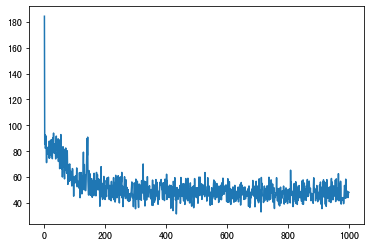

In [26]:
plt.plot(losses)

## 抖动的原因：每次只取了一点数据，优点：快，缺点：数据大时不行
## 下面让k,b服从正态分布，正态分布优点：所有值会集中在0左右摆动

In [53]:
feed_dict = {
    node_x: X_rm,
    node_k1: np.random.normal(),
    node_b1: np.random.normal(),
    node_k2: np.random.normal(),
    node_b2: np.random.normal(),
    node_y_ture: y_
}

In [54]:
computing_graph = convert_all_placeholder_to_graph(feed_dict)

order = topologic(computing_graph)

In [55]:
epoch = 10000
batch_num = len(X_rm)
losses = []

for e in tqdm_notebook(range(epoch)):
    loss = 0
    for b in range(batch_num):
        index = np.random.choice(len(X_rm)) # Stocasitc Gradient Descent SGD 随机梯度下降
        node_x.value = X_rm[index]
        node_y_ture.value = y_[index]

        run_one_epoch(order)
        optimize(order)
        
        loss += node_loss.value
        
    losses.append(loss / batch_num)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


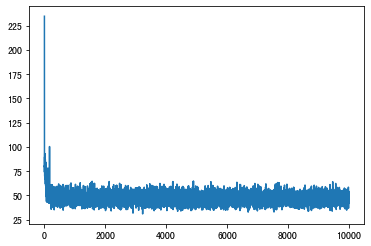

In [57]:
plt.plot(losses)

## 做预测

In [58]:
def predict(x):
    node_x.value = x
    feedforward(order)
    return node_linear_02.value

In [59]:
predict(5)

19.555302045136575

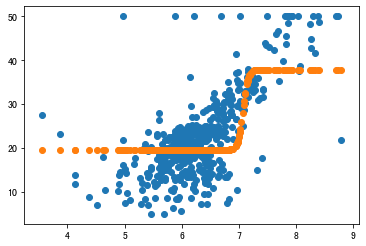

In [60]:
plt.scatter(X_rm,y_)
plt.scatter(X_rm,[predict(x_) for x_ in X_rm])

## 真实的数据有13个维度，由于上边维度只取了一个，拟合程度已经很好了
## 上边可以解决一维的问题，但是现实生活中，大多数都是多维的情况
## 如何解决多维函数拟合
+ 点积运算改为点乘
+ y和yhat要拉平

In [56]:
data['data'].shape

(506, 13)

In [67]:
import numpy as np
import random

class Node:
    def __init__(self, inputs=[]):
        self.inputs = inputs
        self.outputs = []

        for n in self.inputs:
            n.outputs.append(self)
            # set 'self' node as inbound_nodes's outbound_nodes

        self.value = None

        self.gradients = {}
        # keys are the inputs to this node, and their
        # values are the partials of this node with 
        # respect to that input.
        # \partial{node}{input_i}
        

    def forward(self):
        '''
        Forward propagation. 
        Compute the output value vased on 'inbound_nodes' and store the 
        result in self.value
        '''

        raise NotImplemented
    

    def backward(self):

        raise NotImplemented
        
class Placeholder(Node):
    def __init__(self):
        '''
        An Input node has no inbound nodes.
        So no need to pass anything to the Node instantiator.
        '''
        Node.__init__(self)

    def forward(self, value=None):
        '''
        Only input node is the node where the value may be passed
        as an argument to forward().
        All other node implementations should get the value of the 
        previous node from self.inbound_nodes
        
        Example: 
        val0: self.inbound_nodes[0].value
        '''
        if value is not None:
            self.value = value
            ## It's is input node, when need to forward, this node initiate self's value.

        # Input subclass just holds a value, such as a data feature or a model parameter(weight/bias)
        
    def backward(self):
        self.gradients = {self:0}
        for n in self.outputs:
            grad_cost = n.gradients[self]
            self.gradients[self] = grad_cost * 1
            
        
        # input N --> N1, N2
        # \partial L / \partial N 
        # ==> \partial L / \partial N1 * \ partial N1 / \partial N


class Add(Node):
    def __init__(self, *nodes):
        Node.__init__(self, nodes)


    def forward(self):
        self.value = sum(map(lambda n: n.value, self.inputs))
        ## when execute forward, this node caculate value as defined.

class Linear(Node):
    def __init__(self, nodes, weights, bias):
        Node.__init__(self, [nodes, weights, bias])

    def forward(self):
        inputs = self.inputs[0].value
        weights = self.inputs[1].value
        bias = self.inputs[2].value

        self.value = np.dot(inputs, weights) + bias
        
    def backward(self):

        # initial a partial for each of the inbound_nodes.
        self.gradients = {n: np.zeros_like(n.value) for n in self.inputs}

        for n in self.outputs:
            # Get the partial of the cost w.r.t this node.
            grad_cost = n.gradients[self]

            self.gradients[self.inputs[0]] = np.dot(grad_cost, self.inputs[1].value.T) # 点积运算改为点乘
            self.gradients[self.inputs[1]] = np.dot(self.inputs[0].value.T, grad_cost)
            self.gradients[self.inputs[2]] = np.sum(grad_cost, axis=0, keepdims=False)

        # WX + B / W ==> X
        # WX + B / X ==> W

class Sigmoid(Node):
    def __init__(self, node):
        Node.__init__(self, [node])


    def _sigmoid(self, x):
        return 1./(1 + np.exp(-1 * x))

    def forward(self):
        self.x = self.inputs[0].value
        self.value = self._sigmoid(self.x)

    def backward(self):
        self.partial = self._sigmoid(self.x) * (1 - self._sigmoid(self.x))
        
        # y = 1 / (1 + e^-x)
        # y' = 1 / (1 + e^-x) (1 - 1 / (1 + e^-x))
        
        self.gradients = {n: np.zeros_like(n.value) for n in self.inputs}

        for n in self.outputs:
            grad_cost = n.gradients[self]  # Get the partial of the cost with respect to this node.

            self.gradients[self.inputs[0]] = grad_cost * self.partial
            # use * to keep all the dimension same!.



class MSE(Node):
    def __init__(self, y, yhat):
        Node.__init__(self, [y, yhat])


    def forward(self):
        y = self.inputs[0].value.reshape(-1, 1) # 与一维的区别，y和yhat要拉平
        yhat = self.inputs[1].value.reshape(-1, 1)
        assert(y.shape == yhat.shape)

        self.m = self.inputs[0].value.shape[0]
        self.diff = y - yhat

        self.value = np.mean(self.diff**2)


    def backward(self):
        self.gradients[self.inputs[0]] = (2 / self.m) * self.diff
        self.gradients[self.inputs[1]] = (-2 / self.m) * self.diff


def forward_and_backward(graph):
    # execute all the forward method of sorted_nodes.

    ## In practice, it's common to feed in mutiple data example in each forward pass rather than just 1. Because the examples can be processed in parallel. The number of examples is called batch size.
    for n in graph:
        n.forward()
        ## each node execute forward, get self.value based on the topological sort result.

    for n in  graph[::-1]:
        n.backward()

###   v -->  a -->  C
##    b --> C
##    b --> v -- a --> C
##    v --> v ---> a -- > C

def toplogic(graph):
    sorted_node = []
    
    while len(graph) > 0: 

        all_inputs = []
        all_outputs = []
        
        for n in graph:
            all_inputs += graph[n]
            all_outputs.append(n)
        
        all_inputs = set(all_inputs)
        all_outputs = set(all_outputs)
    
        need_remove = all_outputs - all_inputs  # which in all_inputs but not in all_outputs
    
        if len(need_remove) > 0: 
            node = random.choice(list(need_remove))

            need_to_visited = [node]

            if len(graph) == 1: need_to_visited += graph[node]
                
            graph.pop(node)
            sorted_node += need_to_visited
        
            for _, links in graph.items():
                if node in links: links.remove(node)
        else: # have cycle
            break
        
    return sorted_node

from collections import defaultdict


def convert_feed_dict_to_graph(feed_dict):
    computing_graph = defaultdict(list)
    
    nodes = [n for n in feed_dict]
    
    while nodes:
        n = nodes.pop(0) 
        
        if isinstance(n, Placeholder):
            n.value = feed_dict[n]
        
        if n in computing_graph: continue

        for m in n.outputs:
            computing_graph[n].append(m)
            nodes.append(m)
    
    return computing_graph

def topological_sort_feed_dict(feed_dict):
    graph = convert_feed_dict_to_graph(feed_dict)
    
    return toplogic(graph)


def optimize(trainables, learning_rate=1e-2):
    # there are so many other update / optimization methods
    # such as Adam, Mom, 
    for t in trainables:
        t.value += -1 * learning_rate * t.gradients[t]

## 我们把单个维度向量的版本，变成多个向量维度的版本

In [68]:
import pandas as pd

In [69]:
dataframe = pd.DataFrame(data['data'])
dataframe.columns = data['feature_names']

In [70]:
training_data = dataframe[['RM', 'LSTAT']]

In [71]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.utils import shuffle, resample
#from miniflow import *

# Load data
data = load_boston()
X_ = training_data
y_ = data['target']

# Normalize data
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)

n_features = X_.shape[1]
n_hidden = 10
W1_ = np.random.randn(n_features, n_hidden)
b1_ = np.zeros(n_hidden)
W2_ = np.random.randn(n_hidden, 1)
b2_ = np.zeros(1)

# Neural network
X, y = Placeholder(), Placeholder()
W1, b1 = Placeholder(), Placeholder()
W2, b2 = Placeholder(), Placeholder()

l1 = Linear(X, W1, b1)
s1 = Sigmoid(l1)
l2 = Linear(s1, W2, b2)
cost = MSE(y, l2)

feed_dict = {
    X: X_,
    y: y_,
    W1: W1_,
    b1: b1_,
    W2: W2_,
    b2: b2_
}

epochs = 200
# Total number of examples
m = X_.shape[0]
batch_size = 1
steps_per_epoch = m // batch_size

graph = topological_sort_feed_dict(feed_dict)
trainables = [W1, b1, W2, b2]

print("Total number of examples = {}".format(m))

Total number of examples = 506


In [72]:
losses = []

for i in range(epochs):
    loss = 0
    for j in range(steps_per_epoch):
        # Step 1
        # Randomly sample a batch of examples
        X_batch, y_batch = resample(X_, y_, n_samples=batch_size)

        # Reset value of X and y Inputs
        X.value = X_batch
        y.value = y_batch

        # Step 2
    
        forward_and_backward(graph) # set output node not important.

        # Step 3
        rate = 1e-2
    
        optimize(trainables, rate)

        loss += graph[-1].value
    
    if i % 100 == 0: 
        print("Epoch: {}, Loss: {:.3f}".format(i+1, loss/steps_per_epoch))
        losses.append(loss/steps_per_epoch)

Epoch: 1, Loss: 36.681
Epoch: 101, Loss: 17.686


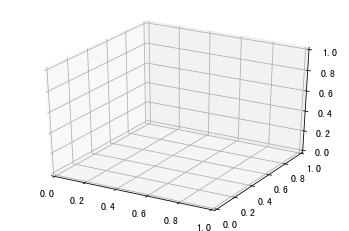

In [74]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

predicate_result = []
for rm, ls in training_data.values:
    # 用rm和ls预测每一个值
    X.value = np.array([[rm, ls]])
    forward_and_backward(graph)
    predicate_result.append(graph[-2].value[0][0])

In [75]:
predicate_result = np.array(predicate_result)

In [76]:
%matplotlib notebook

<IPython.core.display.Javascript object>


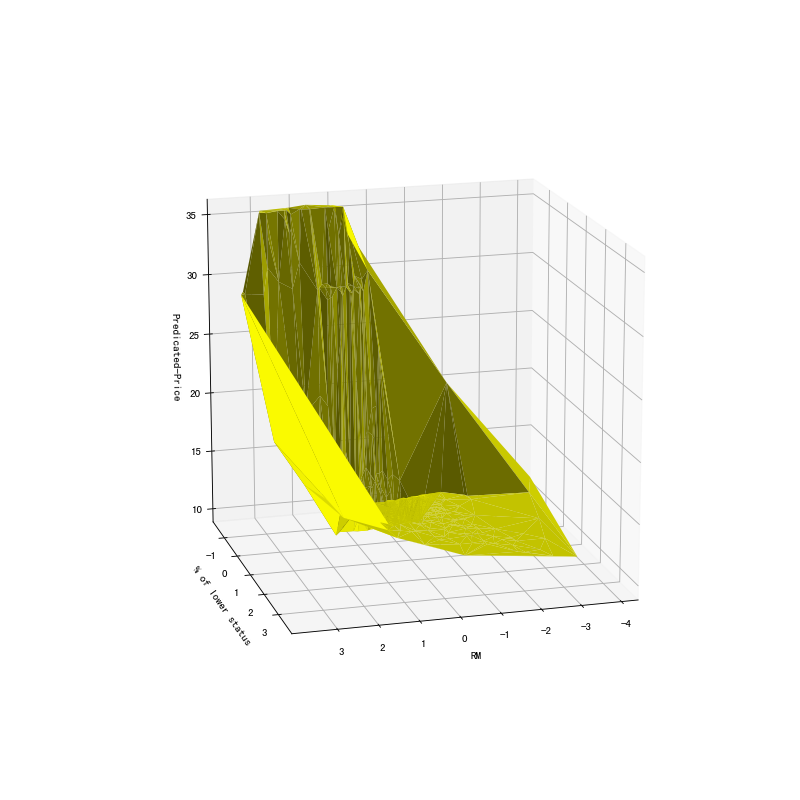

Text(0.5, 0, 'Predicated-Price')

In [78]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Make data.
X = X_.values[:, 0]
Y = X_.values[:, 1]
Z = predicate_result

# Plot the surface.
rm_and_lstp_price = ax.plot_trisurf(X, Y, Z, color='yellow')

ax.set_xlabel('RM')
ax.set_ylabel('% of lower status')
ax.set_zlabel('Predicated-Price')

## TODO:Publish this program to internet
### 需要pycharm，才能发布到互联网